In [41]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rules:
refr: https://www.akudankau.co.id/artikel/6-plus/tinggi-berat-ideal-sesuai-umur

tinggi

7: (109,9 - 137,6)

8: (115 - 144,2)

9: (120- 150,8)

10: (125 - 157,8)

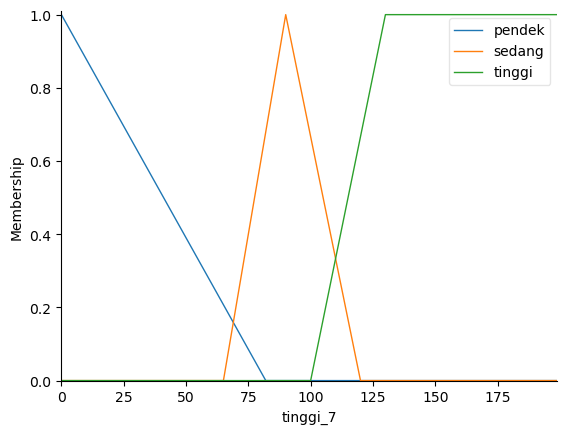

In [42]:
tinggi_7 = ctrl.Antecedent(np.arange(0, 200, 1), 'tinggi_7')
# 82 - 
tinggi_7['pendek'] = fuzz.trimf(tinggi_7.universe, [0, 0, 82])
tinggi_7['sedang'] = fuzz.trimf(tinggi_7.universe, [65, 90, 120])
tinggi_7['tinggi'] = fuzz.trapmf(tinggi_7.universe, [100, 130, 200, 200])

tinggi_7.view()




rules:
refr: https://www.akudankau.co.id/artikel/6-plus/tinggi-berat-ideal-sesuai-umur

berat

7: 16,8 - 26,4

8: 18,6 - 29,7

9: 20,8 - 33,6

10: 23,2 - 38,2

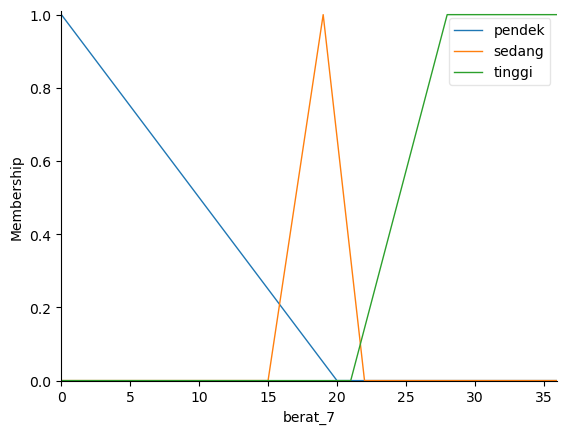

In [43]:
berat_7 = ctrl.Antecedent(np.arange(0, 37, 1), 'berat_7')
# 15.8 - 21,3
berat_7['pendek'] = fuzz.trimf(berat_7.universe, [10, 10, 20])
berat_7['sedang'] = fuzz.trimf(berat_7.universe, [15, 19, 22])
berat_7['tinggi'] = fuzz.trapmf(berat_7.universe, [21, 28, 36, 36])

berat_7.view()


# fuzzy umur 7

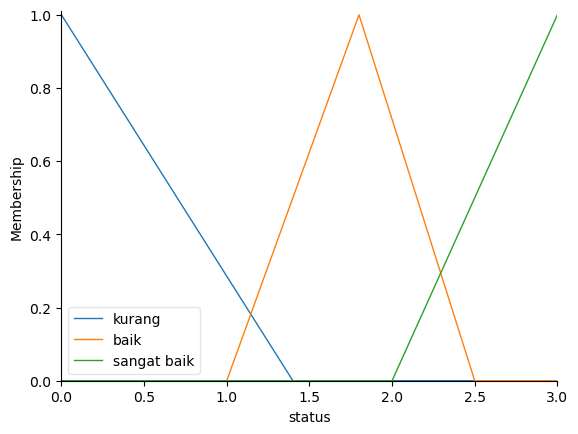

In [44]:
status = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'status')

status['kurang'] = fuzz.trimf(status.universe, [0, 0, 1.4])
status['baik'] = fuzz.trimf(status.universe, [1, 1.8, 2.5])
status['sangat baik'] = fuzz.trimf(status.universe, [2, 3, 3])

status.view()



Fuzzy Rules(berat/tinggi):

- IF berat=='tinggi' && tinggi=='rendah'; THEN 'kurang'
- IF berat=='rendah' && tinggi=='rendah'; THEN 'kurang'
- IF berat=='rendah' && tinggi=='sedang'; THEN 'kurang'
- IF berat=='rendah' && tinggi=='tinggi'; THEN 'kurang'
- IF berat=='sedang' && tinggi=='rendah'; THEN 'kurang'

- IF berat=='sedang' && tinggi=='sedang'; THEN 'baik'
- IF berat=='sedang' && tinggi=='tinggi'; THEN 'baik'
- IF berat=='tinggi' && tinggi=='sedang'; THEN 'baik'

- IF berat=='tinggi' && tinggi=='tinggi'; THEN 'sangat baik'

In [45]:
rules1 = ctrl.Rule( berat_7['pendek'] &tinggi_7['pendek'], status['kurang'])
rules2 = ctrl.Rule( berat_7['pendek'] &tinggi_7['sedang'], status['kurang'])
rules3 = ctrl.Rule( berat_7['pendek'] &tinggi_7['tinggi'], status['kurang'])
rules4 = ctrl.Rule( berat_7['sedang'] &tinggi_7['pendek'], status['kurang'])
rules5 = ctrl.Rule( berat_7['sedang'] &tinggi_7['sedang'], status['baik'])
rules6 = ctrl.Rule( berat_7['sedang'] &tinggi_7['tinggi'], status['baik'])
rules7 = ctrl.Rule( berat_7['tinggi'] &tinggi_7['pendek'], status['kurang'])
rules8 = ctrl.Rule( berat_7['tinggi'] &tinggi_7['sedang'], status['baik'])
rules9 = ctrl.Rule( berat_7['tinggi'] &tinggi_7['tinggi'], status['sangat baik'])


Status untuk berat 20 dan tinggi 123: 1.763888888888889; 2
Status untuk berat 22 dan tinggi 117: 2.1070076405092566; 2
Status untuk berat 15 dan tinggi 107: 0.6166666666666668; 1
Status untuk berat 20 dan tinggi 119: 1.763387533875339; 2
Status untuk berat 20 dan tinggi 117: 1.7622997416020674; 2
Status untuk berat 18 dan tinggi 114: 1.5583780663780666; 1
Status untuk berat 17 dan tinggi 114: 1.4789455178693678; 1
Status untuk berat 16 dan tinggi 107: 1.2734422533058165; 1
Status untuk berat 17 dan tinggi 114: 1.4789455178693678; 1
Status untuk berat 19 dan tinggi 123: 1.679738633600778; 2
Status untuk berat 15 dan tinggi 117: 0.6166666666666668; 1
Status untuk berat 14 dan tinggi 110: 0.6011764705882353; 1
Status untuk berat 19 dan tinggi 127: 1.684412997903564; 1
Status untuk berat 18 dan tinggi 114: 1.5583780663780666; 1
Status untuk berat 18 dan tinggi 115: 1.5667290886392011; 1
Status untuk berat 20 dan tinggi 124: 1.763888888888889; 2
Status untuk berat 19 dan tinggi 111: 1.62943

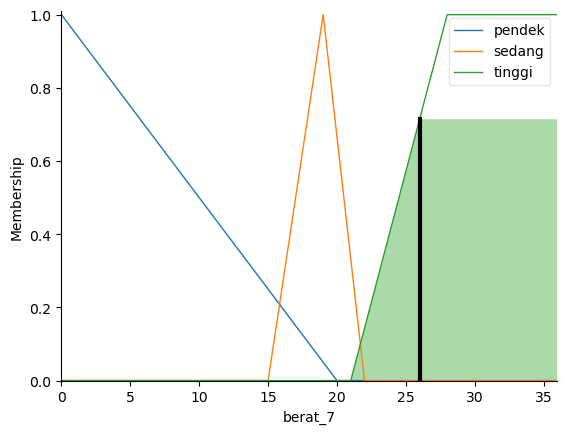

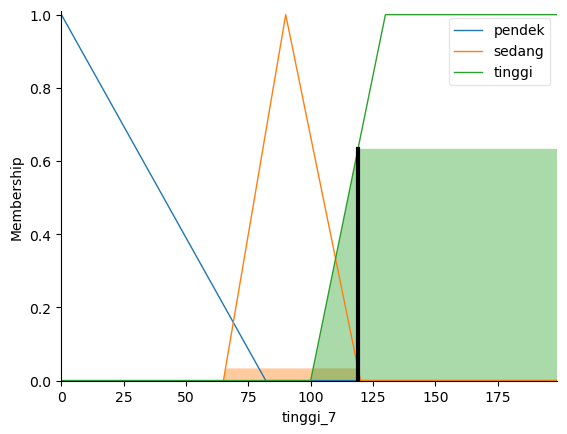

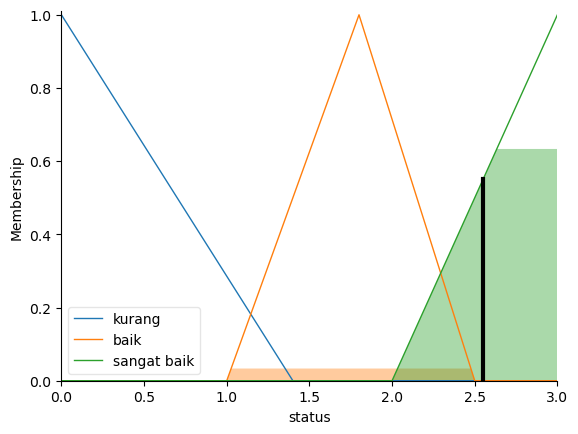

In [46]:
status_control = ctrl.ControlSystem([rules1, rules2, rules3, rules4, rules5, rules6, rules7, rules8, rules9])
status_simulation = ctrl.ControlSystemSimulation(status_control)
berat = np.array([20, 22, 15, 20, 20, 18, 17, 16, 17, 19, 15, 14, 19, 18, 18, 20, 19, 14, 15, 15, 22, 26])
tinggi = np.array([123, 117, 107, 119, 117, 114, 114, 107, 114, 123, 117, 110, 127, 114, 115, 124, 111, 108, 115, 112, 124, 119])
eval = np.array([2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 3])
hasil = np.zeros(22)

for i in range(22):
    status_simulation.input['berat_7'] = berat[i]
    status_simulation.input['tinggi_7'] = tinggi[i]
    status_simulation.compute()
    hasil[i] = status_simulation.output['status']

    if i == 21:
        berat_7.view(sim=status_simulation)
        tinggi_7.view(sim=status_simulation)
        status.view(sim=status_simulation)
    
    print(f"Status untuk berat {berat[i]} dan tinggi {tinggi[i]}: {status_simulation.output['status']}; {eval[i]}")



In [47]:
print(f"Status: {eval[20]}; hasil: {hasil[20]}")

Status: 2; hasil: 2.534798534798535
